In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# load the data
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Pclass-->  ticket class
    # 1 = upper, 2 = midle, 3 = lower
# SibSP -->  # of siblings / spouses aboard the Titanic	
# Parch -->  # of parents / children aboard the Titanic
# ticket-->  #ticket number
# Fare  -->  Passenger fare keraye
# Cabin -->  Cabin number
# Embarked-->port of embarkation

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### delete 'PassengerId','Name','Ticket'


In [6]:
train.drop(['PassengerId','Name','Ticket',],axis=1,inplace=True)
test.drop(['PassengerId','Name','Ticket',],axis=1,inplace=True)

### turn sex to binary attr


In [7]:
def binarySex(x):
    if x == 'male':
        return 0
    else:
        return 1
train['SexB'] = train['Sex'].apply(binarySex)
test['SexB'] = train['Sex'].apply(binarySex)
train.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)

In [8]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,SexB
0,0,3,22.0,1,0,7.2500,NaN,S,0
1,1,1,38.0,1,0,71.2833,C85,C,1
2,1,3,26.0,0,0,7.9250,NaN,S,1
3,1,1,35.0,1,0,53.1000,C123,S,1
4,0,3,35.0,0,0,8.0500,NaN,S,0


### fill age Nan with median


In [9]:
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(train['Age'].median())

In [10]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,SexB
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.352413
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


### add family column frim sibsp and parch


In [11]:
train['family'] = train['SibSp'] + train['Parch']
test['family'] = test['SibSp'] + test['Parch']
train.drop(['SibSp','Parch'],axis=1,inplace=True)
test.drop(['SibSp','Parch'],axis=1,inplace=True)

### fill embarked null with most freq


In [12]:
train['Embarked'].fillna(train['Embarked'].value_counts().index[0], inplace=True)
test['Embarked'].fillna(train['Embarked'].value_counts().index[0], inplace=True)

### turn embarked to numeric value


In [13]:
def encodeEmbarked(x):
    if x == 'S':
        return 0
    elif x == 'C':
        return 1
    else:
        return 2

train['EmbarkedB'] = train['Embarked'].apply(encodeEmbarked)
test['EmbarkedB'] = test['Embarked'].apply(encodeEmbarked)
train.drop(['Embarked'],axis=1,inplace=True)
test.drop(['Embarked'],axis=1,inplace=True)

### drop Cabin because of NaN


In [14]:
print(train['Cabin'].count())
print(len(train['Cabin'].unique()))

204
148


In [15]:
train.drop(['Cabin'],axis=1,inplace=True)
test.drop(['Cabin'],axis=1,inplace=True)

In [16]:
train.head(10)

,Survived,Pclass,Age,Fare,SexB,family,EmbarkedB
0,0,3,22.0,7.2500,0,1,0
1,1,1,38.0,71.2833,1,1,1
2,1,3,26.0,7.9250,1,0,0
3,1,1,35.0,53.1000,1,1,0
4,0,3,35.0,8.0500,0,0,0
5,0,3,28.0,8.4583,0,0,2
6,0,1,54.0,51.8625,0,0,0
7,0,3,2.0,21.0750,0,4,0
8,1,3,27.0,11.1333,1,2,0
9,1,2,14.0,30.0708,1,1,1


### choose if we should keep Fare


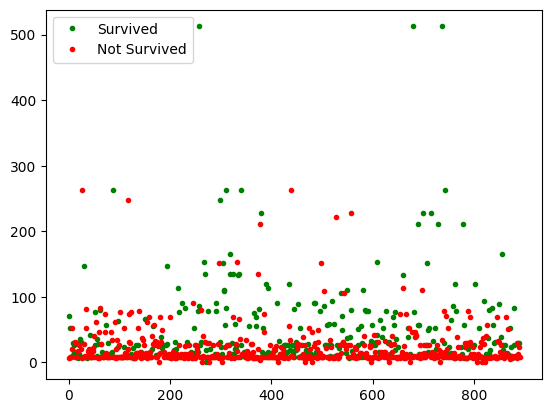

In [17]:
plt.plot(train[train['Survived']==1]['Fare'],color='green',marker='.',linestyle='') 
plt.plot(train[train['Survived']==0]['Fare'],color='red',marker='.',linestyle='')
plt.legend(['Survived','Not Survived'])

In [18]:
print('servived Fare mean : ',train[train['Survived']==1]['Fare'].mean())
print('not servived Fare mean : ',train[train['Survived']==0]['Fare'].mean())

servived Fare mean :  48.39540760233918
not servived Fare mean :  22.117886885245902


### fill Nan of Fare


In [19]:
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())
test['Fare'] = test['Fare'].fillna(train['Fare'].mean())

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Age        891 non-null    float64
 3   Fare       891 non-null    float64
 4   SexB       891 non-null    int64  
 5   family     891 non-null    int64  
 6   EmbarkedB  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


### turn ages to groups


C:\Users\Houraad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Houraad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


<AxesSubplot: xlabel='Age', ylabel='Survived'>

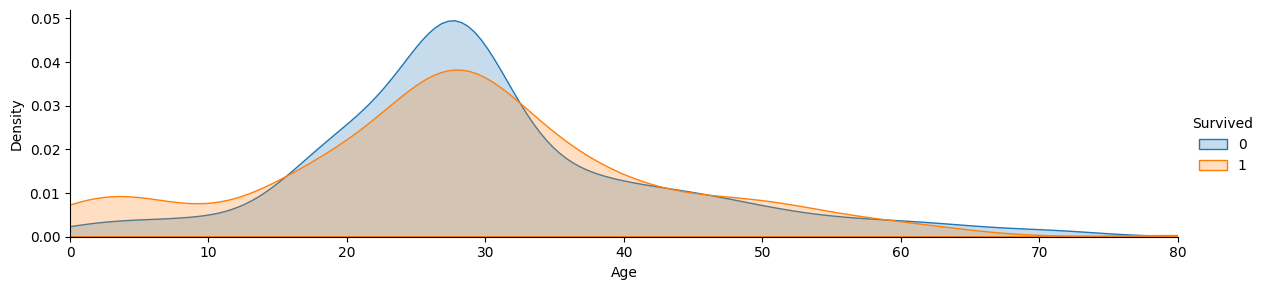

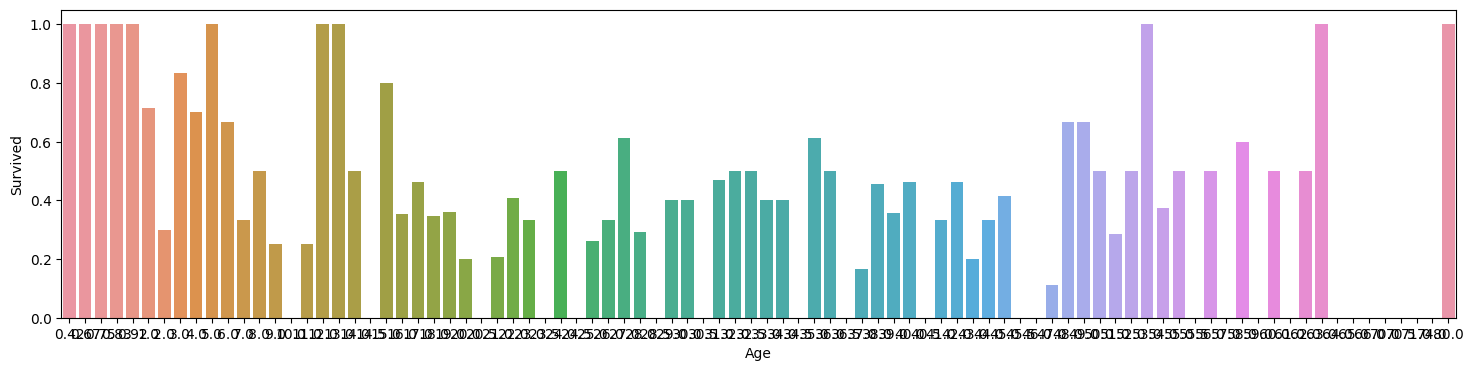

In [21]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [22]:
train['AgeBand'] = pd.cut(train['Age'], 5)


<AxesSubplot: xlabel='AgeBand', ylabel='Survived'>

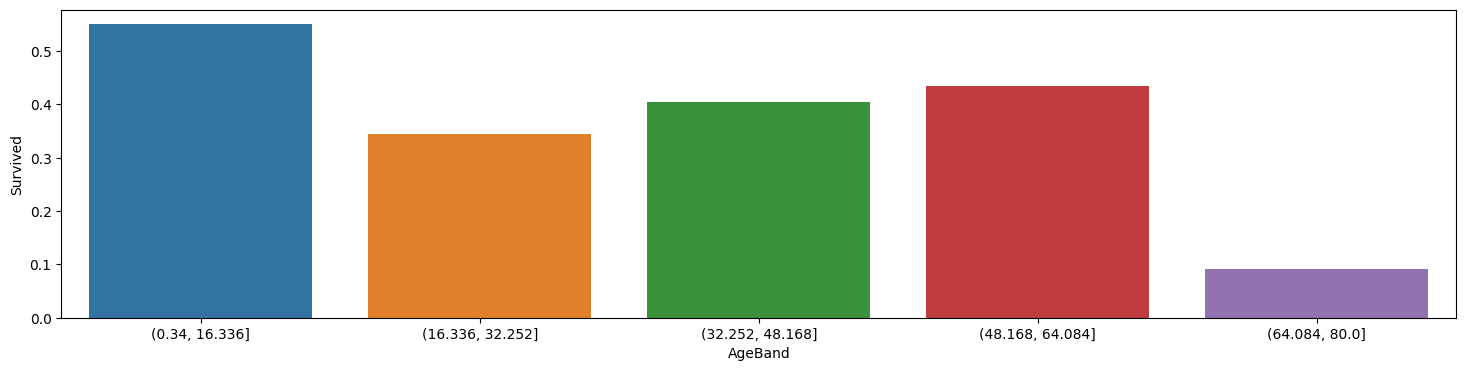

In [23]:

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train[["AgeBand", "Survived"]].groupby(['AgeBand'],as_index=False).mean()
sns.barplot(x='AgeBand', y='Survived', data=average_age)

In [24]:
train.loc[ train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age']
train.drop(['AgeBand'],axis=1,inplace=True)

test.loc[ test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[ test['Age'] > 64, 'Age']



81    67.0
96    76.0
Name: Age, dtype: float64

In [25]:
train.head()

,Survived,Pclass,Age,Fare,SexB,family,EmbarkedB
0,0,3,1.0,7.2500,0,1,0
1,1,1,2.0,71.2833,1,1,1
2,1,3,1.0,7.9250,1,0,0
3,1,1,2.0,53.1000,1,1,0
4,0,3,2.0,8.0500,0,0,0


### turn fare to groups


C:\Users\Houraad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Houraad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


<AxesSubplot: xlabel='Fare', ylabel='Survived'>

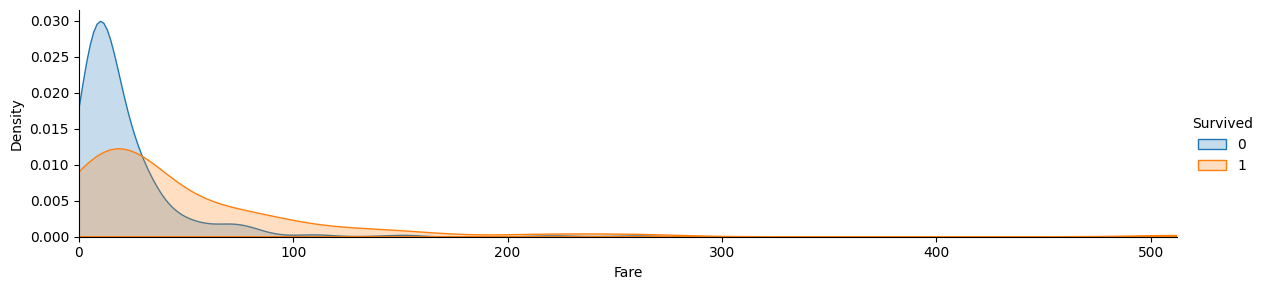

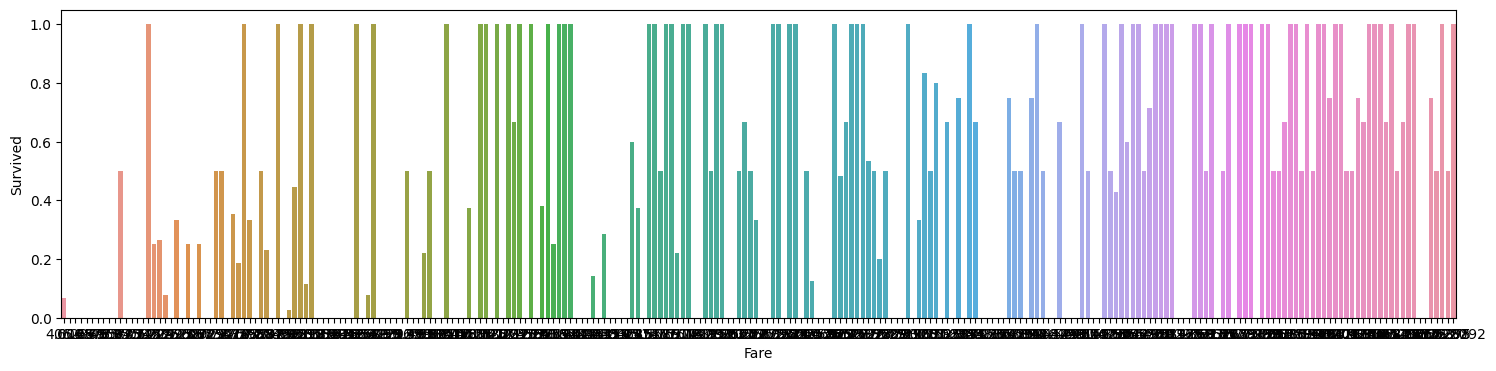

In [26]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(train['Fare'].min(), train['Fare'].max()))
facet.add_legend()

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train[["Fare", "Survived"]].groupby(['Fare'],as_index=False).mean()
sns.barplot(x='Fare', y='Survived', data=average_age)

<AxesSubplot: xlabel='FareBand', ylabel='Survived'>

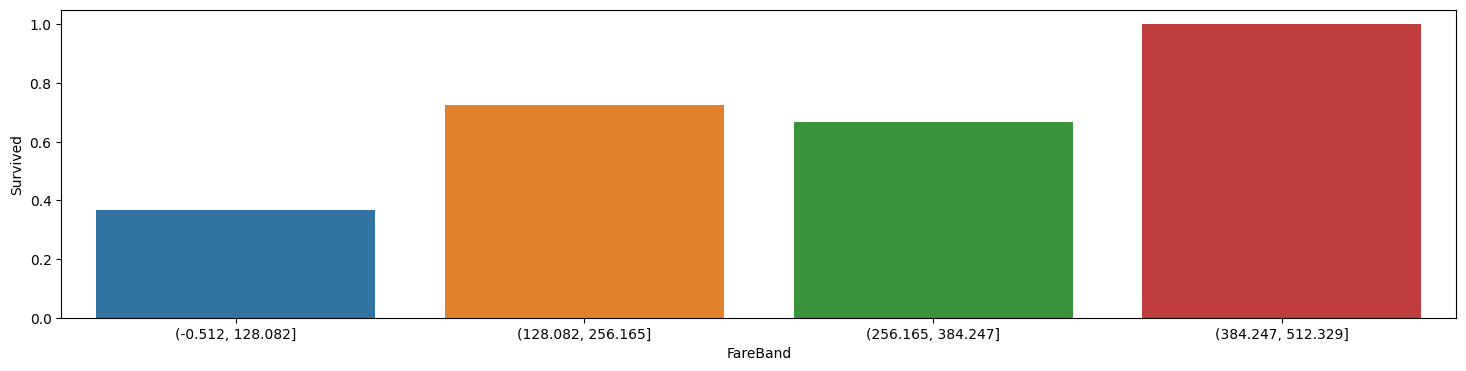

In [27]:
train['FareBand'] = pd.cut(train['Fare'], 4)

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train[["FareBand", "Survived"]].groupby(['FareBand'],as_index=False).mean()
sns.barplot(x='FareBand', y='Survived', data=average_age)

In [28]:
train.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
train.loc[ train['Fare'] > 31, 'Fare'] = 3
train['Fare'] = train['Fare'].astype(int)

test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3
test['Fare'] = test['Fare'].astype(int)


In [29]:
train.drop(['FareBand'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,Fare,SexB,family,EmbarkedB
0,0,3,1.0,0,0,1,0
1,1,1,2.0,3,1,1,1
2,1,3,1.0,1,1,0,0
3,1,1,2.0,3,1,1,0
4,0,3,2.0,1,0,0,0


In [30]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn import Linear
from torch import nn

In [31]:
class DataSet(Dataset):
    def __init__(self,data,transform = None):
        self.data = data
        self.dataLen = data.shape[0]
        self.transform = transform
    def __len__(self):
        return self.len
    
    def __getitem__(self,idx):
        if self.transform:
            return self.transform(self.data.iloc[idx,1:]), self.transform(self.data.iloc[idx,0])
        else:
            return self.data.iloc[idx,1:],self.data.iloc[idx,0]


In [32]:
dataSetTrain = DataSet(train)

In [33]:
class LR(nn.Module):
    def __init__(self,inputSize,outputSize):
        super(LR,self).__init__()
        self.linear = nn.Linear(inputSize,outputSize)
    
    def forward(self,x):
        out = self.linear(x)
        return out
    

In [36]:
class Plot():
    def __init__(self,X,Y,w,stop,go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameterValues = torch.arange(start,stop)
        self.LossFunction = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
    
    def __call__(self,Yhat,w,error,n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    def __del__(self):
        plt.close('all')

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import accuracy_score
# from pandas_profiling import ProfileReport
import seaborn as sns

In [44]:
X_train = train.drop(columns='Survived').to_numpy()
Y_train = train['Survived'].to_numpy()

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [110]:
PF = PolynomialFeatures(2)
PF.fit(X_train)
X_train_poly = PF.transform(X_train)
X_val_poly = PF.transform(X_val) 

In [111]:
lr = linear_model.LogisticRegression(max_iter=1000)
lr.fit(X_train_poly,y_train)

LogisticRegression(max_iter=1000)

In [112]:
lr.score(X_train_poly,y_train),lr.score(X_val_poly,y_val)

(0.8258426966292135, 0.8156424581005587)

In [119]:
train.head(10)

,Survived,Pclass,Age,Fare,SexB,family,EmbarkedB
0,0,3,1.0,0,0,1,0
1,1,1,2.0,3,1,1,1
2,1,3,1.0,1,1,0,0
3,1,1,2.0,3,1,1,0
4,0,3,2.0,1,0,0,0
5,0,3,1.0,1,0,0,2
6,0,1,3.0,3,0,0,0
7,0,3,0.0,2,0,4,0
8,1,3,1.0,1,1,2,0
9,1,2,0.0,2,1,1,1


<AxesSubplot: >

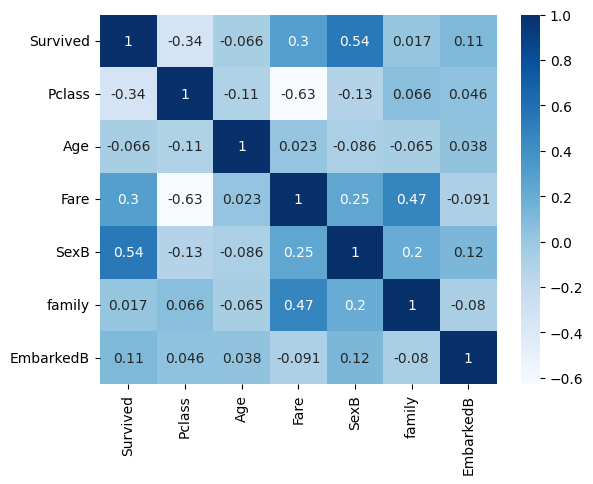

In [128]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Blues)
